# Practical Project (Car Price Prediction) using the Linear Regression

# Introduction

We will be working with a data set based on [Real-life Car Prices](https://www.kaggle.com/keerthiperumal/104reallife-examplecsv).

There are an extensive number of features, so they've been described in the table below.

### Predictor

* Price: The car's sale price in dollars. 

### Features

* Brand: The name of company that manufactured the car
* Body: Type of Car Body
* Mileage: How many Miles that the car run ?
* EngineV: Engine Volume
* Engine Type: petrol or diesel or gas
* Registration: Does the car registrated or not ?
* Year : The year when the car sold ...
* Model : the model of the car

## Importing the libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [90]:
pd.get_option('display.max_rows')


60

## Loading the data

In [91]:
raw_data = pd.read_csv("Real-life example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


In [92]:
raw_data.dtypes.value_counts()

object     5
float64    2
int64      2
dtype: int64

## Data Exploration

In [93]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [94]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.00,4345.00,4195.00,4345.00
mean,19418.75,161.24,2.79,2006.55
std,25584.24,105.71,5.07,6.72
min,600.00,0.00,0.60,1969.00
25%,6999.00,86.00,1.80,2003.00
50%,11500.00,155.00,2.20,2008.00
75%,21700.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


In [95]:
#notice that there are some missing values (since the count isn't the same)
#notice that there are outliers from max price is really differ from the 75%

In [96]:
raw_data.describe(include=[object])

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


## Exploraing the relationship between Variables

<AxesSubplot:>

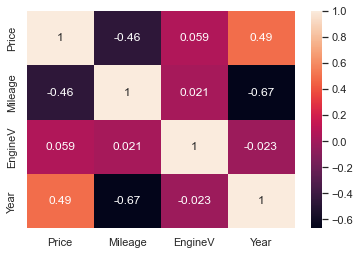

In [97]:
sns.heatmap(raw_data.corr(), annot=True)

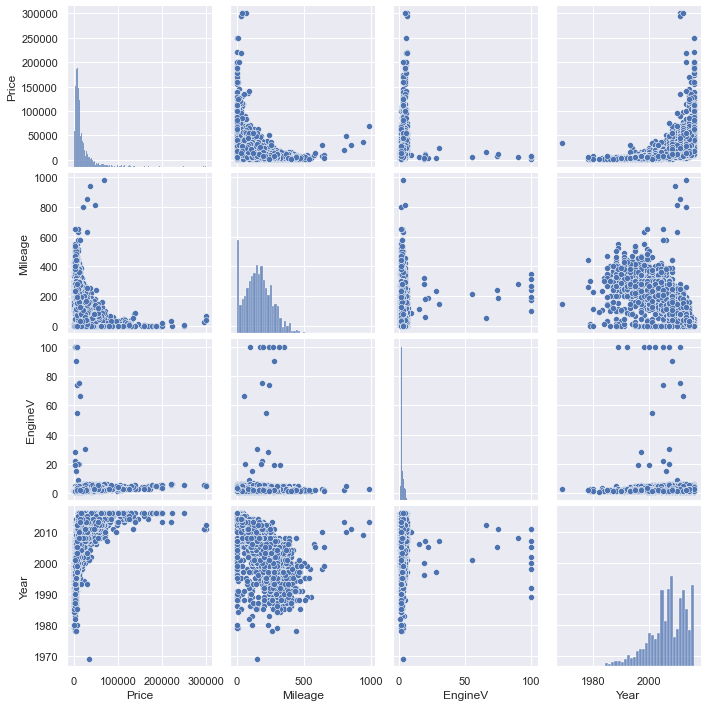

In [98]:
sns.pairplot(raw_data)

## Data Preprocessing

### 1. Dropping the (Model-Column) as it will make more than 300 dummies

In [99]:
# notice that there are 312 unique models which are too many to be benefical in predication. Therefore, drop the feature.
data = raw_data.drop(["Model"], axis=1)
data.describe(include=[object])

,Brand,Body,Engine Type,Registration
count,4345,4345,4345,4345
unique,7,6,4,2
top,Volkswagen,sedan,Diesel,yes
freq,936,1649,2019,3947


### 2. Dropping the (null-missing-values)

In [100]:
data.isnull().sum().sort_values(ascending=False)

Price           172
EngineV         150
Brand             0
Body              0
Mileage           0
Engine Type       0
Registration      0
Year              0
dtype: int64

In [101]:
# we see that some Price and EngineV are missing.
data_no_mv = data.dropna(axis=0)

## Dealing With Duplicates

In [102]:
data_no_mv.duplicated().sum()

66

In [103]:
data_no_mv = data_no_mv.drop_duplicates()

In [104]:
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4342
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3959 non-null   object 
 1   Price         3959 non-null   float64
 2   Body          3959 non-null   object 
 3   Mileage       3959 non-null   int64  
 4   EngineV       3959 non-null   float64
 5   Engine Type   3959 non-null   object 
 6   Registration  3959 non-null   object 
 7   Year          3959 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 278.4+ KB


## Exploring the Distribution of the Numerical Features

<AxesSubplot:xlabel='Price', ylabel='Count'>

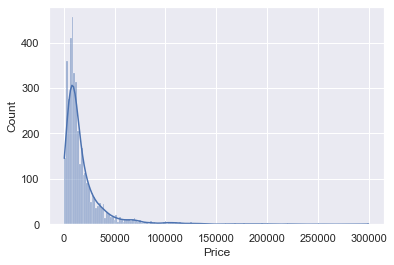

In [105]:
sns.histplot(data_no_mv['Price'], kde=True)
# hisplot() is a seaborn plotting which show histogram 
#kde = kernel density estimation -> to show the kde line 

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

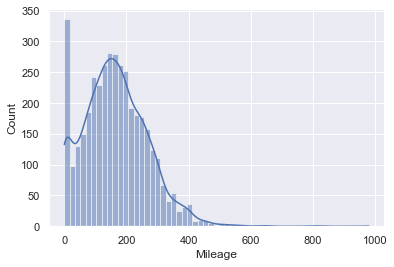

In [106]:
sns.histplot(data_no_mv['Mileage'], kde=True)
#the histogram shape is kinda right skew too. Therefore let's do the same quantile(0.99)

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

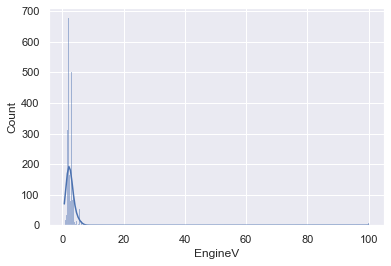

In [107]:
sns.histplot(data_no_mv['EngineV'], kde=True)
#the data is not make sense. The most Engine Volume that is still legit is 6.5 litre. 
# The 99.99 in the dataframe must be some kind of mistakes

#let's drop any observations that has EngineV more than 6.5 

<AxesSubplot:xlabel='Year', ylabel='Count'>

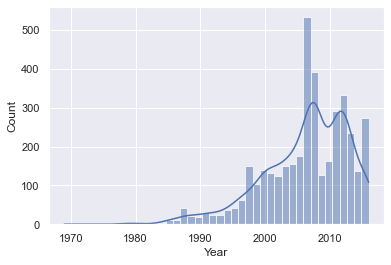

In [108]:
sns.histplot(data_no_mv['Year'], kde=True)
#we see that there are few 'vintage' cars from 1969 which is droppable for better generalize the model

## Dealing with Outliers

In [109]:
#q_low = df["col"].quantile(0.01)
#q_hi  = df["col"].quantile(0.99)
#df_filtered = df[(df["col"] < q_hi) & (df["col"] > q_low)]

In [110]:
#let's keep only the first 99% of the cheapest car in the model and drop the 1% most expensive cars out
# to do that, using the quantile() method is good.

q1 = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q1]

<AxesSubplot:xlabel='Price', ylabel='Count'>

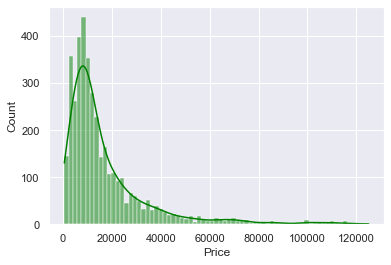

In [111]:
sns.histplot(data_1['Price'], kde=True, color = 'green')

In [112]:
q2 = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q2]

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

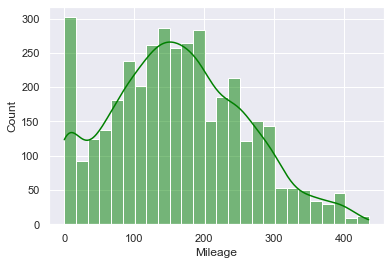

In [113]:
sns.histplot(data_2['Mileage'], kde=True, color = 'green')

In [114]:
q3 = 6.5
data_3 = data_2[data_2['EngineV']<q3]

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

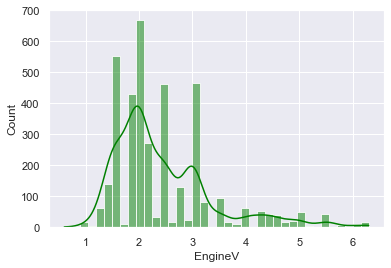

In [115]:
sns.histplot(data_3['EngineV'], kde=True, color = 'green')

In [116]:
q4 = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q4]

<AxesSubplot:xlabel='Year', ylabel='Count'>

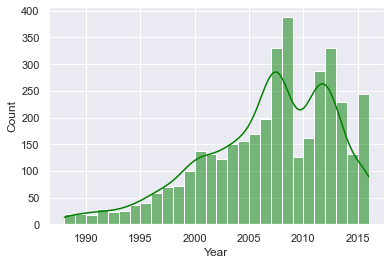

In [117]:
sns.histplot(data_4['Year'], kde=True, color = 'green')

In [118]:
data_cleaned = data_4
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4336,Renault,2100.00,vagon,237,1.90,Diesel,no,2001
4337,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014


In [119]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3796,Renault,2100.00,vagon,237,1.90,Diesel,no,2001
3797,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007
3798,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
3799,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014


In [120]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3801.00,3801.00,3801.00,3801.00
mean,17640.39,161.95,2.45,2006.61
std,18162.43,95.28,0.95,6.09
min,800.00,0.00,0.60,1988.00
25%,7150.00,94.00,1.80,2003.00
50%,11500.00,158.00,2.20,2007.00
75%,21000.00,228.00,3.00,2011.00
max,124999.00,435.00,6.30,2016.00


In [121]:
data_cleaned.describe(include="object")

,Brand,Body,Engine Type,Registration
count,3801,3801,3801,3801
unique,7,6,4,2
top,Volkswagen,sedan,Diesel,yes
freq,832,1441,1766,3439


## Checking relationship between the Numerical Featuress and Target

In [122]:
#To make sure that we can use linear regression, we need to check the OLS(ordinary least square) assumption
# OLS Assumption 1: The linear regression model is “linear in parameters.”
# OLS Assumption 2: There is a random sampling of observations (Checked***)
# OLS Assumption 3: The conditional mean should be zero. 
# OLS Assumption 5: Spherical errors: There is homoscedasticity and no autocorrelation. 
# OLS Assumption 6: Error terms should be normally distributed. (Checked***)

Text(0.5, 1.0, 'Price and Mileage')

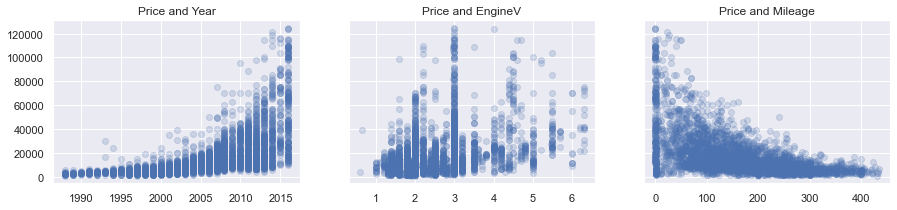

In [123]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'], alpha=0.2)
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'], alpha=0.2)
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'], alpha=0.2)
ax3.set_title('Price and Mileage')

## Checking the Normality of the Target

In [124]:
from scipy.stats.mstats import normaltest
normaltest(data_cleaned['Price'].values)

NormaltestResult(statistic=2119.225765934225, pvalue=0.0)

<AxesSubplot:xlabel='Price', ylabel='Count'>

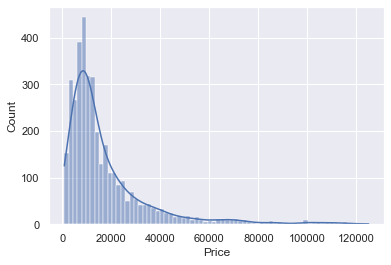

In [125]:
sns.histplot(data_cleaned["Price"], kde=True)

## Relaxing the Target (Making the target with a normal distribution)

### Testing (Log)

<AxesSubplot:xlabel='Price', ylabel='Count'>

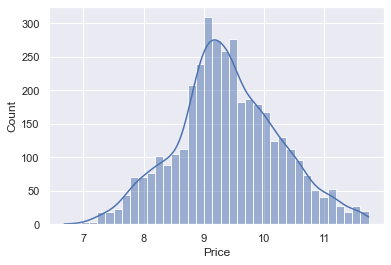

In [126]:
log_price = np.log(data_cleaned['Price'])
sns.histplot(log_price, kde=True)

In [127]:
normaltest(log_price.values)

NormaltestResult(statistic=8.423881028958249, pvalue=0.014817586680008153)

### Testing (Sqrt)

<AxesSubplot:xlabel='Price', ylabel='Count'>

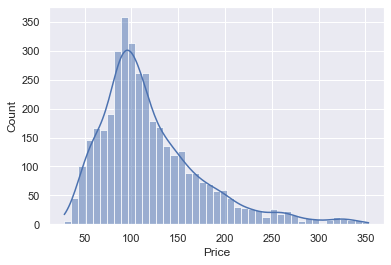

In [128]:
sqrt_price= np.sqrt(data_cleaned['Price'])
sns.histplot(sqrt_price, kde=True)

In [129]:
normaltest(sqrt_price.values)

NormaltestResult(statistic=882.8690377218613, pvalue=1.9383149127095287e-192)

### Testing (Box-Cox)

In [130]:
from scipy.stats import boxcox

bc_result = boxcox(data_cleaned['Price'])
bc_result

(array([7.00050558, 7.43454618, 7.7835772 , ..., 7.68693207, 7.97910629,
        7.30180334]),
 -0.04335874558669167)

<AxesSubplot:ylabel='Count'>

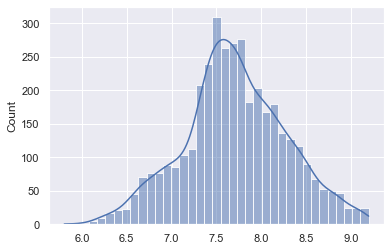

In [131]:
normal_price = bc_result[0]
sns.histplot(normal_price, kde=True)

In [132]:
normaltest(normal_price)

NormaltestResult(statistic=1.0624552924371184, pvalue=0.5878828143794131)

In [133]:
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3796,Renault,2100.00,vagon,237,1.90,Diesel,no,2001,7.65
3797,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,8.82
3798,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3799,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79


## Checking relationship between the Numerical Featuress and Target after Normalizing

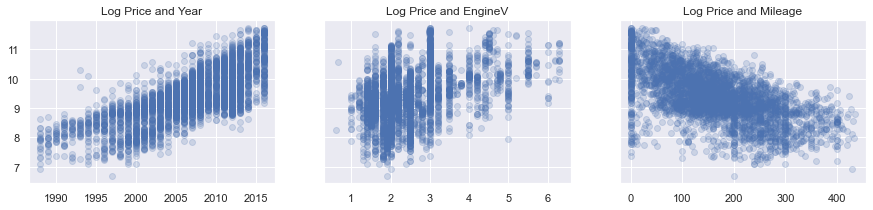

In [134]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'], alpha=0.2)
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'], alpha=0.2)
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'], alpha=0.2)
ax3.set_title('Log Price and Mileage')


plt.show()

In [135]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

## Checking the Multicollinearity

In [174]:
# we can use VIF (Variance Inflation Factor) to detetmine the Milticollinearity 
# Milticollinearity = the linear relationship within each features
data_cleaned.columns.values


array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [138]:
vif

,VIF,features
0,3.86,Mileage
1,10.35,Year
2,7.66,EngineV


In [175]:
# Year feature has a very high VIF which show the multicollinearity. Therefore, drop this feature from the model
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [140]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,9.50
3,Audi,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,9.81


## Dealing With Catergorical objected Variables

In [141]:
# Now it's time to deal with dummy variable since there are several categorial variables
# pd.get_dummies() are very helpful to turn this categological variables into dummies
# drop_first cut the redundant feature
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [142]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [143]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [176]:
#Now, the final touch. Let's drop the price and move the Log Price to the first column

cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [145]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,7.65,237,1.90,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3797,8.82,152,1.60,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3798,9.35,163,2.50,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3799,9.79,35,1.60,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


## Creating the Linear Model

### Decleare the Inputs and Target

In [146]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Features Scaling

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [148]:
scaler.fit(inputs)

StandardScaler()

In [149]:
inputs_scaled = scaler.transform(inputs)

### Data Splitting

In [150]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

### Model Training


In [151]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [152]:
y_hat = reg.predict(x_train)

## First Check(The Linearity Rlationship)

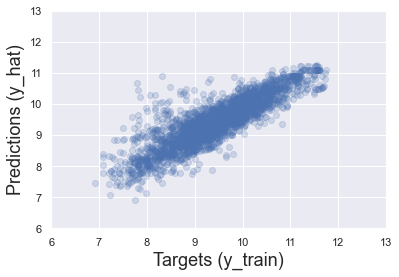

In [178]:
plt.scatter(y_train, y_hat , alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

## Second Check(The Residual Distribution)

Text(0.5, 1.0, 'Residuals Distribution')

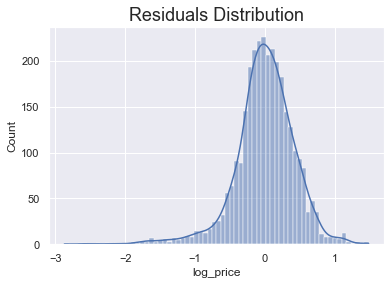

In [179]:
sns.histplot(y_train-y_hat, kde=True)
plt.title("Residuals Distribution", size=18)
#even the residuals are piling at zero as ecpected, some are highly negative as shown by left skew
# we will deal with that later to improve the model

## Third Check(The R-Squared)


In [155]:
reg.score(x_train, y_train)

0.7477402838858502

### Model Cofficent and Weights

In [180]:
#to describe the model let's show the bias and weights of the test model (bias is the intercept and weights are the coeficients)
reg.intercept_


9.403881388004978

In [157]:
reg.coef_
# Noted that this is the coef to the relation to 'Log Price'
# Also, noted that the categorical inputs are dummied and the coef is not very expnlanatory
# normally the we don't scale the categorical features -> Will deal with that later.

array([-0.45631422,  0.20808205,  0.00630999, -0.0026039 , -0.14246701,
       -0.19139893, -0.06346172, -0.09806177, -0.14303402, -0.09915699,
       -0.19900301, -0.13036366, -0.15821981, -0.11950969, -0.0267944 ,
       -0.1420562 ,  0.3132769 ])

In [158]:
model_summery = pd.DataFrame(inputs.columns.values, columns=['Features'])
model_summery["Weights"] = reg.coef_
model_summery

,Features,Weights
0,Mileage,-0.46
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,-0.00
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.19
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.10
8,Body_hatch,-0.14
9,Body_other,-0.10


## Testing the Model

In [159]:
y_hat_test = reg.predict(x_test)

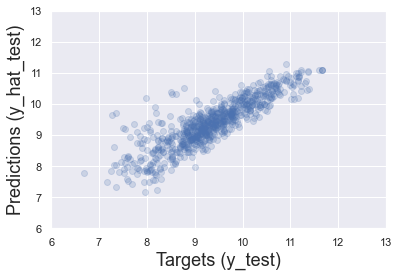

In [181]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Now we already have the train model ready and explained. 
#It's time to test the model with the test data to see the accuracy of the model

#Earlier we have prepared the train_test_split data to test the model. 
#After the training, now is the time to use the test data to test the model

#remember don't train(fit) the model on this test data. We need to test the old fitted model on the new data.

In [161]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,5962.26
1,6969.19
2,8502.02
3,22856.39
4,29158.90


In [162]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,5962.26,NaN
1,6969.19,7900.00
2,8502.02,NaN
3,22856.39,NaN
4,29158.90,NaN


In [163]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.07
1    9.31
2    8.94
3    9.74
4   10.25
Name: log_price, dtype: float64

In [164]:
df_pf['Target'] = np.exp(y_test)
df_pf
#let use a dataframe to compare the output (price) of the test prediction (y_hat_test) and the actual data (y_test)

#remember that the output here is the Log Price while we need the actual price.
# thus using np.exp() to turn the log into the normal number

,Prediction,Target
0,5962.26,8700.00
1,6969.19,11100.00
2,8502.02,7650.00
3,22856.39,16950.00
4,29158.90,28350.00
...,...,...
756,11482.92,8999.00
757,11133.17,12900.00
758,40297.02,44000.00
759,9180.27,4200.00


In [165]:

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,5962.26,8700.00,2737.74,31.47
1,6969.19,11100.00,4130.81,37.21
2,8502.02,7650.00,-852.02,11.14
3,22856.39,16950.00,-5906.39,34.85
4,29158.90,28350.00,-808.90,2.85
...,...,...,...,...
756,11482.92,8999.00,-2483.92,27.60
757,11133.17,12900.00,1766.83,13.70
758,40297.02,44000.00,3702.98,8.42
759,9180.27,4200.00,-4980.27,118.58


In [166]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,761.00,761.00,761.00,761.00
mean,15748.67,16800.92,1052.25,40.85
std,12626.39,17039.03,8592.93,80.67
min,1281.88,800.00,-29898.17,0.01
25%,7294.63,6800.00,-2422.37,10.48
50%,11746.27,10900.00,171.03,23.99
75%,20091.86,20300.00,2566.08,41.18
max,78082.13,115800.00,52587.58,969.10


In [167]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
672,41896.26,41900.00,3.74,0.01
537,9002.69,9000.00,-2.69,0.03
665,17013.38,16999.00,-14.38,0.08
256,9814.98,9800.00,-14.98,0.15
238,7513.72,7500.00,-13.72,0.18
...,...,...,...,...
572,30479.29,4999.00,-25480.29,509.71
706,32614.14,4950.00,-27664.14,558.87
721,26371.74,2900.00,-23471.74,809.37
683,15172.39,1450.00,-13722.39,946.37


### Model Evaluation

In [168]:
reg.score(x_train, y_train)

0.7477402838858502

In [169]:
reg.score(x_test, y_test)

0.7440854586595802

In [170]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_hat_test)

In [171]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_hat_test)

0.3184406801763223

In [172]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat_test)

0.20004650445230482

In [173]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat_test, multioutput= 'uniform_average')

0.7440854586595802